## Linear Regression, Correlation, Coefficient of Determination


#### We are going to apply a model to predict the responce of treatment for diabetes using the ''diabetes'' dataset in sklearn. We will use Linear Regression for the model to try to fit the best-fit line to the input of feature data and the output response is a measure of disease progression one year after baseline measurments were taken. We will then calculate the regression coefficients, the mean squere error (MSE) and the coefficient of determination (R2). We will also standardize the data for the greater metric accuracy.


#### In trying to determine the best-fit that describes the relationship of the input features with the output response, we will briefly mention ways of performing this method. 

#### Coefficient of determination and MSE they both are a type of metrics which are used for evaluating the performance of the regression models, especially statistical model such as linear regression model. The difference is that MSE gets pronounced based on whether the data is scaled or not. R-squared represents the fraction of variance of response variable captured by the regression model rather than the MSE which captures the residual error.

In [2]:
from sklearn import datasets
from sklearn import preprocessing
#The sklearn. preprocessing package provides several common utility functions and transformer classes
                    #to change raw feature vectors into a representation that is more suitable for the downstream estimators. 
                    #In general, learning algorithms benefit from standardization of the data set.
import pandas as pd 



In [5]:
# Import the diabetes datasets that we want to work with 

diabetes_data = datasets.load_diabetes()
df_diabetes = pd.DataFrame(diabetes_data.data,columns= diabetes_data.feature_names)
df_diabetes['response'] = pd.Series(diabetes_data.target)
df_diabetes.head(10)
#A data frame is a table or a two-dimensional array-like structure in which each column contains values of one variable 
#and each row contains one set of values from each column.

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,response
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062913,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066630,0.090620,0.108914,0.022869,0.017703,-0.035817,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014956,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033214,-0.012577,-0.034508,-0.024993,-0.002592,0.067736,-0.013504,310.0


### Lets just look at the collumns titles



In [6]:
[col for col in df_diabetes.columns]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'response']

### Predictors is a list containing the input features

In [7]:
# predictors = ['age']
#predictors = ['bmi'] #0.40
#predictors = ['bp']  #0.19
#predictors = ['s5']  #0.31
#predictors = ['s4']  #0.17
predictors = ['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'] # 0.52 , 3250
#predictors = ['bmi','bp','s4','s5'] # 0.45, 2923
#predictors = ['bmi','s5']
#predictors = ['bmi','s5','s6']
#predictors = ['bmi','bp','s5','s6']


#### response is a list containing the response and is a measure of disease progression one year after the basline measurments we taken

In [8]:
response = ['response']

#### Creating our x and y variables to train our data.The preprocessing.scale() algorithm puts your data on one scale. This is helpful with largely sparse datasets. In simple words, your data is vastly spread out. Scaling the data brings all your values onto one scale eliminating the sparsity. In regards to know how it works in mathematical detail, this follows the same concept of Normalization and Standardization

In [9]:
x = df_diabetes[predictors]
x = preprocessing.scale(x)

In [10]:
y = df_diabetes[response]

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [13]:
linrgr = LinearRegression()
linrgr.fit(x_train, y_train)

LinearRegression()

In [16]:
linrgr.score(x_train,y_train)

0.5186517632435609

### Lets now predict what our model will output for the test data input 

In [15]:
y_pred = linrgr.predict(x_test)

### Lets now predict what our model will output for the test data input 

In [17]:
y_pred = linrgr.predict(x_test)

### Here are the regression coefficients

In [18]:
print('Regression Coeffs:\n',linrgr.coef_)

Regression Coeffs:
 [[  0.08110876 -11.66246737  26.62288967  13.71681996 -10.21354615
    5.98556525 -13.95225044  -1.35016013  24.52264517   2.96223743]]


#### The coefficient of determination (R2) is the correlation coefficient squared. This will give an indication of which features contributed more in explaining the variance in the output response

In [19]:
print('Coeff of Determination:\n', r2_score(y_test,y_pred))

Coeff of Determination:
 0.4892885498546953


### This will calculate the Mean Squared Error between our model output and the tested one. Here we compare our model output to the actual data response output using the selected y test data 

In [20]:
print('MSE:\n', mean_squared_error(y_test,y_pred))

MSE:
 3250.810648678834


### Here we create a  scatterplot that will draw a regression line if we put the Xi from our list of data that have an impact on the 'respone', i can try to put 'bmi' and if i run the code below it will give me a linear regression threw the values of 'bmi'

In [22]:
import seaborn as sns
#sns.scatterplot(df_diabetes['---'],df_diabetes['response']);
#sns.scatterplot(df_diabetes['bmi'],df_diabetes['response']);
#plt.plot(x_test,y_pred, color='red',linewidth=2)

In [23]:
from itertools import chain
feature_importance = linrgr.coef_
feature_importance = list(chain.from_iterable(feature_importance))
print(feature_importance)

[0.08110876475561331, -11.662467365297028, 26.622889672917495, 13.716819962029058, -10.213546151603552, 5.985565248836682, -13.9522504440153, -1.3501601310055034, 24.52264517439233, 2.962237431263052]


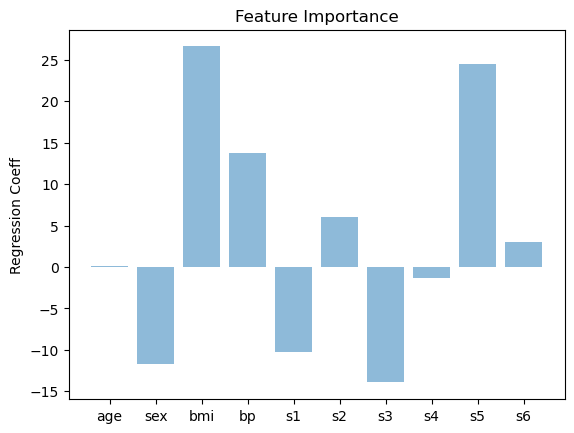

[0.08110876475561331, -11.662467365297028, 26.622889672917495, 13.716819962029058, -10.213546151603552, 5.985565248836682, -13.9522504440153, -1.3501601310055034, 24.52264517439233, 2.962237431263052]


In [24]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

features = ('age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6')
y_pos = np.arange(len(features))

plt.bar(y_pos,feature_importance,align='center',alpha=0.5)
plt.xticks(y_pos,features)
plt.ylabel('Regression Coeff')
plt.title('Feature Importance')
plt.show()
print(feature_importance)